In [173]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import random
%matplotlib inline

In [174]:
sns.set_style('white')

# Join source files

#### Incomes

In [175]:
df_incomes = pd.read_csv('yearly_incomes_in_real_estate.csv')
df_incomes.head()

person_id                  person_name        income  real_estate_price  \
0          8   Зюганов Геннадий Андреевич  3.736946e+06       2.390986e+07   
1          9       Алферов Жорес Иванович  1.680704e+07       9.951926e+08   
2         10   Андреев Андрей Анатольевич  4.176869e+06       4.880553e+07   
3         11  Апарина Алевтина Викторовна  2.302677e+06       6.026755e+06   
4         12     Афонин Юрий Вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  
0                       6.398235  
1                      59.212825  
2                      11.684715  
3                       2.617282  
4                      19.856290

In [176]:
df_incomes['person_name'] = df_incomes['person_name'].str.lower()

In [177]:
df_incomes.shape

(51673, 5)

In [178]:
df_incomes.drop_duplicates(['person_id']).shape

(51673, 5)

#### Contracts

In [179]:
df_contracts = pd.read_csv('person_contracts.csv')
df_contracts.shape

(209900, 6)

In [180]:
df_contracts['person_name'] = df_contracts['person_name'].str.lower() 

In [181]:
df_contracts.head()

person_name  contracts_count  contracts_sum  \
0                              a a a              690   1.076667e+09   
1  abdulkarimova gulsina hidijatovna                1   5.032130e+05   
2     abdunasirov magomed ahmedovich               10   8.572522e+06   
3         adamski michail ykovlevich              370   1.005988e+08   
4                adiev abduraschid a                5   4.464164e+06   

   min_year  max_year  entries_count  
0    2010.0    2019.0              1  
1    2014.0    2014.0              1  
2    2012.0    2014.0              1  
3    2010.0    2019.0              1  
4    2012.0    2015.0              1

#### NGO

In [182]:
df_nko = pd.read_csv('nko_counts.csv')
df_nko.head()

person_name  active_nko_count  liquidated_nko_count
0                    - none none               5.0                  10.0
1              - нуралии саидзод               1.0                   0.0
2                 - тхаргйе none               1.0                   0.0
3         cуанова аида сергеевна               1.0                   0.0
4  none айман мухаммед эль-сайид               1.0                   0.0

#### Region incomes

In [183]:
df_region_income = pd.read_csv('person_region_incomes.csv')
df_region_income.head()

person_id                 region  region_avg_wage  region_yearly_income
0          8   российская федерация     37111.190909         445334.290909
1          9   российская федерация     37111.190909         445334.290909
2         10   российская федерация     37111.190909         445334.290909
3         11  волгоградская область     25977.618182         311731.418182
4         12   российская федерация     37111.190909         445334.290909

## Merge

In [184]:
merged_df = pd.merge(df_incomes, df_contracts, on='person_name', how='left')
merged_df.shape

(51952, 10)

In [185]:
merged_df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count  
0       NaN            NaN  
1       NaN            NaN  
2    2019.0            2.0  
3       NaN            NaN  
4       NaN            NaN

In [186]:
merged_df = pd.merge(merged_df, df_region_income, on='person_id', how='left')
merged_df.shape

(51952, 13)

In [187]:
merged_df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count                 region  region_avg_wage  \
0       NaN            NaN   российская федерация     37111.190909   
1       NaN            NaN   российская федерация     37111.190909   
2    2019.0            2.0   российская федерация     37111.190909   
3       NaN            NaN  волгоградская область     25977.618182   
4       NaN            NaN   российская федерация     37111.190909   

   region_yearly_income  
0         445334.290909  
1         445334.290909  
2         445334.290909  
3         311731.418182  
4         445334.290909

In [188]:
merged_df = pd.merge(merged_df, df_nko, on='person_name', how='left')
merged_df.shape

(51952, 15)

In [189]:
merged_df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count                 region  region_avg_wage  \
0       NaN            NaN   российская федерация     37111.190909   
1       NaN            NaN   российская федерация     37111.190909   
2    2019.0            2.0   российская федерация     37111.190909   
3       NaN            NaN  волгоградская область     25977.618182   
4       NaN            NaN   российская федерация     37111.190909   

   region_yearly_income  active_nko_count  liquidated_nko_count  
0         445334.290909               1.0                   0.0  
1         445334.290909               NaN                   NaN  
2         445334.290909               2.0                   0.0  
3         311731.418182               NaN                   NaN  
4         445334.290909               NaN                   NaN

In [190]:
df_offshore = pd.read_csv('offshores_found.csv')
df_offshore = df_offshore[['person_id', 'offshore_found']]
df_offshore.head()

person_id  offshore_found
0          8           False
1          9           False
2         10           False
3         11           False
4         12           False

In [191]:
merged_df = pd.merge(merged_df, df_offshore, on='person_id', how='left')
merged_df.shape

(51952, 16)

In [192]:
merged_df.head().T

0  \
person_id                                               8   
person_name                    зюганов геннадий андреевич   
income                                        3.73695e+06   
real_estate_price                             2.39099e+07   
yearly_incomes_in_real_estate                     6.39824   
contracts_count                                       NaN   
contracts_sum                                         NaN   
min_year                                              NaN   
max_year                                              NaN   
entries_count                                         NaN   
region                               российская федерация   
region_avg_wage                                   37111.2   
region_yearly_income                               445334   
active_nko_count                                        1   
liquidated_nko_count                                    0   
offshore_found                                      False   

                                                    1  \
person_id                                           9   
person_name                    алферов жорес иванович   
income                                     1.6807e+07   
real_estate_price                         9.95193e+08   
yearly_incomes_in_real_estate                 59.2128   
contracts_count                                   NaN   
contracts_sum                                     NaN   
min_year                                          NaN   
max_year                                          NaN   
entries_count                                     NaN   
region                           российская федерация   
region_avg_wage                               37111.2   
region_yearly_income                           445334   
active_nko_count                                  NaN   
liquidated_nko_count                              NaN   
offshore_found                                  False   

                                                        2  \
person_id                                              10   
person_name                    андреев андрей анатольевич   
income                                        4.17687e+06   
real_estate_price                             4.88055e+07   
yearly_incomes_in_real_estate                     11.6847   
contracts_count                                        12   
contracts_sum                                 3.40643e+06   
min_year                                             2010   
max_year                                             2019   
entries_count                                           2   
region                               российская федерация   
region_avg_wage                                   37111.2   
region_yearly_income                               445334   
active_nko_count                                        2   
liquidated_nko_count                                    0   
offshore_found                                      False   

                                                         3  \
person_id                                               11   
person_name                    апарина алевтина викторовна   
income                                         2.30268e+06   
real_estate_price                              6.02676e+06   
yearly_incomes_in_real_estate                      2.61728   
contracts_count                                        NaN   
contracts_sum                                          NaN   
min_year                                               NaN   
max_year                                               NaN   
entries_count                                          NaN   
region                               волгоградская область   
region_avg_wage                                    25977.6   
region_yearly_income                                311731   
active_nko_count                                       NaN   
liquidated_nko_count                                   NaN   
offshore_found    

In [193]:
merged_df.to_csv('dark_index_source.csv', index=None)

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


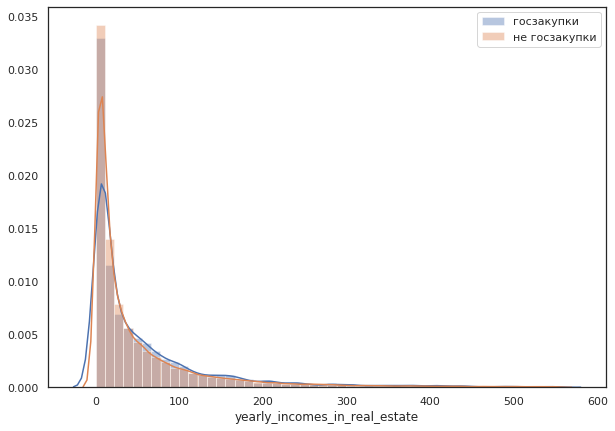

In [194]:
clean_merged = merged_df[merged_df.yearly_incomes_in_real_estate < merged_df.yearly_incomes_in_real_estate.quantile(0.96)]
plt.figure(figsize=(10, 7))
sns.distplot(clean_merged[clean_merged.entries_count > 0].yearly_incomes_in_real_estate, label='госзакупки', kde=True)
sns.distplot(clean_merged[clean_merged.entries_count.isnull()].yearly_incomes_in_real_estate, label='не госзакупки', kde=True)
plt.legend()
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


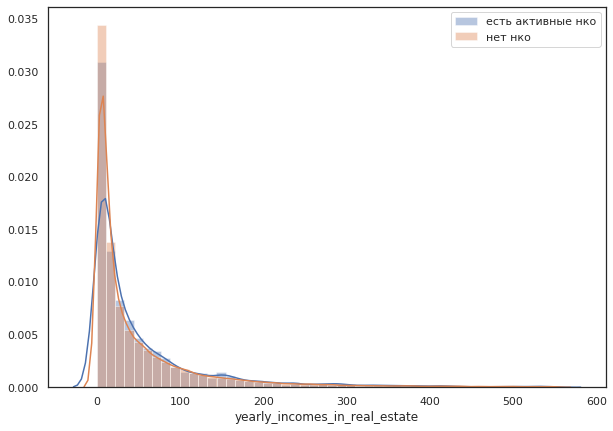

In [195]:
clean_merged = merged_df[merged_df.yearly_incomes_in_real_estate < merged_df.yearly_incomes_in_real_estate.quantile(0.96)]
plt.figure(figsize=(10, 7))
sns.distplot(clean_merged[clean_merged.active_nko_count > 0].yearly_incomes_in_real_estate, label='есть активные нко', kde=True)
sns.distplot(clean_merged[clean_merged.active_nko_count.isnull()].yearly_incomes_in_real_estate, label='нет нко', kde=True)
plt.legend()
plt.show()

In [196]:
merged_df.to_csv('dark_index_source.csv', index=None)

In [197]:
df = merged_df

In [198]:
df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count                 region  region_avg_wage  \
0       NaN            NaN   российская федерация     37111.190909   
1       NaN            NaN   российская федерация     37111.190909   
2    2019.0            2.0   российская федерация     37111.190909   
3       NaN            NaN  волгоградская область     25977.618182   
4       NaN            NaN   российская федерация     37111.190909   

   region_yearly_income  active_nko_count  liquidated_nko_count  \
0         445334.290909               1.0                   0.0   
1         445334.290909               NaN                   NaN   
2         445334.290909               2.0                   0.0   
3         311731.418182               NaN                   NaN   
4         445334.290909               NaN                   NaN   

   offshore_found  
0           False  
1           False  
2           False  
3           False  
4           False

# Factors

#### factor_real_estate_q76
The ratio of real estate value to yearly income is over 75 percentile for this person.
That means they would have to work for 70 years to buy that real estate. 

#### factor_real_estate_q96
The ratio of real estate value to yearly income is over 96 percentile for this person.

#### factor_contracts_q51
The person was combined to more contracts than median.

#### factor_liq_nko_q81
The person has many liquidated NGO's

#### factor_active_nko

#### factor_region_wages_deviation
Measures how much more income the official has compared to an average person in his region.

#### factor_offshore
Person was found in Offshore Leaks database

## factor_real_estate_q75

In [199]:
def no_o(arr, q=0.05):
    # no outliers
    return arr[(arr < arr.quantile(1-q))&(arr > arr.quantile(q))]

In [200]:
# df = pd.read_csv('dark_index_source.csv')

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


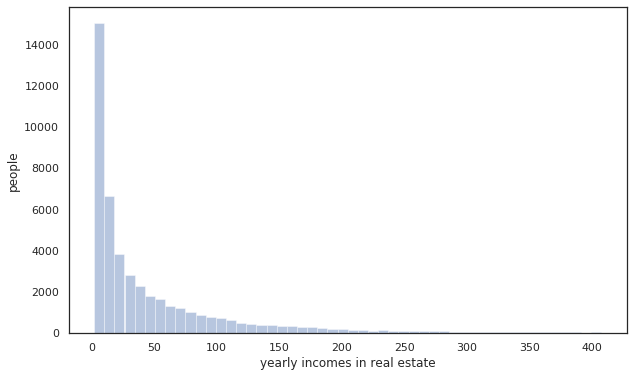

In [201]:
plt.figure(figsize=(10, 6))
sns.distplot(no_o(df.yearly_incomes_in_real_estate), kde=False)
plt.xlabel('yearly incomes in real estate')
plt.ylabel('people')
plt.show()

In [202]:
# df.head()

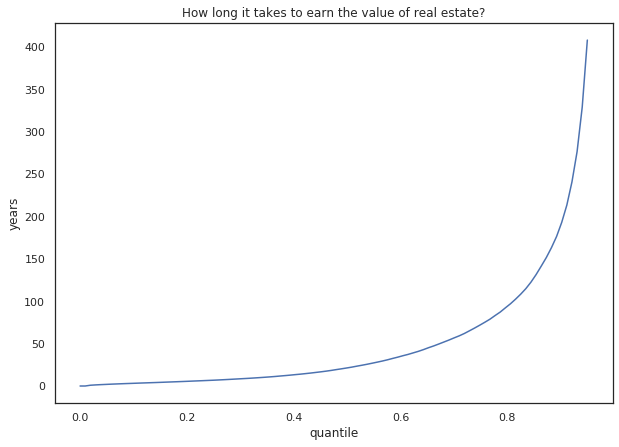

In [203]:
quantiles = np.linspace(0, 0.95, 100)
values = [df.yearly_incomes_in_real_estate.quantile(q) for q in quantiles]

plt.figure(figsize=(10, 7))
sns.lineplot(quantiles, values)
plt.xlabel('quantile')
plt.ylabel('years')
plt.title('How long it takes to earn the value of real estate?')
plt.show()

In [204]:
df['factor_real_estate_q76'] = df.yearly_incomes_in_real_estate >= df.yearly_incomes_in_real_estate.quantile(0.76)

## factor_real_estate_q96

In [205]:
df['factor_real_estate_q96'] = df.yearly_incomes_in_real_estate >= df.yearly_incomes_in_real_estate.quantile(0.96)

## factor_contracts_q51

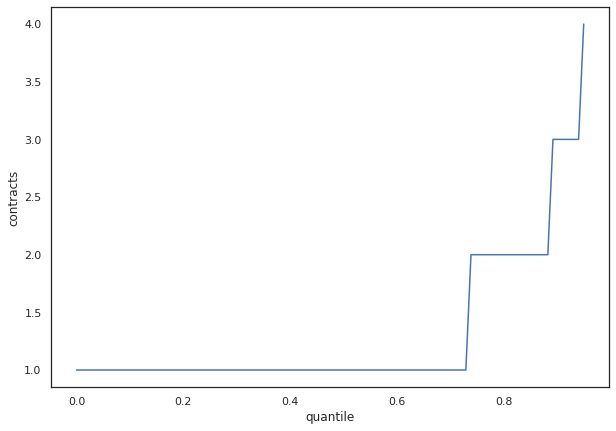

In [206]:
quantiles = np.linspace(0, 0.95, 100)
values = [df.entries_count.quantile(q) for q in quantiles]

plt.figure(figsize=(10, 7))
plt.plot(quantiles, values)
plt.xlabel('quantile')
plt.ylabel('contracts')
plt.show()

In [207]:
df['factor_contracts_q51'] = df.entries_count >= df.entries_count.quantile(0.51)

In [208]:
df.entries_count[df.entries_count > 3].shape

(412,)

In [209]:
df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count                 region  region_avg_wage  \
0       NaN            NaN   российская федерация     37111.190909   
1       NaN            NaN   российская федерация     37111.190909   
2    2019.0            2.0   российская федерация     37111.190909   
3       NaN            NaN  волгоградская область     25977.618182   
4       NaN            NaN   российская федерация     37111.190909   

   region_yearly_income  active_nko_count  liquidated_nko_count  \
0         445334.290909               1.0                   0.0   
1         445334.290909               NaN                   NaN   
2         445334.290909               2.0                   0.0   
3         311731.418182               NaN                   NaN   
4         445334.290909               NaN                   NaN   

   offshore_found  factor_real_estate_q76  factor_real_estate_q96  \
0           False                   False                   False   
1           False                   False                   False   
2           False                   False                   False   
3           False                   False                   False   
4           False                   False                   False   

   factor_contracts_q51  
0                 False  
1                 False  
2                  True  
3                 False  
4                 False

In [210]:
df[df.factor_real_estate_q76 & (df.income >= 5*10**6)].iloc[0]

person_id                                                  55
person_name                      савицкая светлана евгеньевна
income                                            1.06754e+07
real_estate_price                                 1.06346e+10
yearly_incomes_in_real_estate                         996.173
contracts_count                                           NaN
contracts_sum                                             NaN
min_year                                                  NaN
max_year                                                  NaN
entries_count                                             NaN
region                                   российская федерация
region_avg_wage                                       37111.2
region_yearly_income                                   445334
active_nko_count                                            1
liquidated_nko_count                                        0
offshore_found                                          False
factor_r

In [211]:
df[df.factor_contracts_q51].head()

person_id                    person_name        income  real_estate_price  \
2          10     андреев андрей анатольевич  4.176869e+06       4.880553e+07   
18         27       куликов олег анатольевич  3.078592e+06       1.140821e+08   
28         37  афанасьева елена владимировна  5.163198e+06       1.378427e+08   
29         37  афанасьева елена владимировна  5.163198e+06       1.378427e+08   
44         52        романов петр васильевич  9.196404e+06       3.167643e+08   

    yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
2                       11.684715             12.0   3.406433e+06    2010.0   
18                      37.056564              7.0   1.040473e+05    2013.0   
28                      26.697157              9.0   1.028188e+06    2018.0   
29                      26.697157            177.0   2.258489e+08    2010.0   
44                      34.444370              3.0   5.712526e+05    2011.0   

    max_year  entries_count                region  region_avg_wage  \
2     2019.0            2.0  российская федерация     37111.190909   
18    2014.0            1.0  российская федерация     37111.190909   
28    2019.0            1.0  российская федерация     37111.190909   
29    2019.0            4.0  российская федерация     37111.190909   
44    2014.0            1.0  российская федерация     37111.190909   

    region_yearly_income  active_nko_count  liquidated_nko_count  \
2          445334.290909               2.0                   0.0   
18         445334.290909               0.0                   1.0   
28         445334.290909               NaN                   NaN   
29         445334.290909               NaN                   NaN   
44         445334.290909               NaN                   NaN   

    offshore_found  factor_real_estate_q76  factor_real_estate_q96  \
2            False                   False                   False   
18           False                   False                   False   
28           False                   False                   False   
29           False                   False                   False   
44           False                   False                   False   

    factor_contracts_q51  
2                   True  
18                  True  
28                  True  
29                  True  
44                  True

## factor_liq_nko_q81

In [212]:
df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count                 region  region_avg_wage  \
0       NaN            NaN   российская федерация     37111.190909   
1       NaN            NaN   российская федерация     37111.190909   
2    2019.0            2.0   российская федерация     37111.190909   
3       NaN            NaN  волгоградская область     25977.618182   
4       NaN            NaN   российская федерация     37111.190909   

   region_yearly_income  active_nko_count  liquidated_nko_count  \
0         445334.290909               1.0                   0.0   
1         445334.290909               NaN                   NaN   
2         445334.290909               2.0                   0.0   
3         311731.418182               NaN                   NaN   
4         445334.290909               NaN                   NaN   

   offshore_found  factor_real_estate_q76  factor_real_estate_q96  \
0           False                   False                   False   
1           False                   False                   False   
2           False                   False                   False   
3           False                   False                   False   
4           False                   False                   False   

   factor_contracts_q51  
0                 False  
1                 False  
2                  True  
3                 False  
4                 False

In [213]:
df[df.liquidated_nko_count > 0].shape

(3757, 19)

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


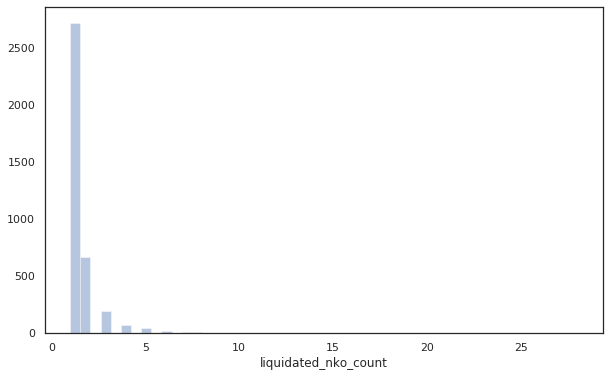

In [214]:
plt.figure(figsize=(10, 6))
sns.distplot(df[df.liquidated_nko_count > 0].liquidated_nko_count, kde=False)#.hist(bins=100)
plt.show()

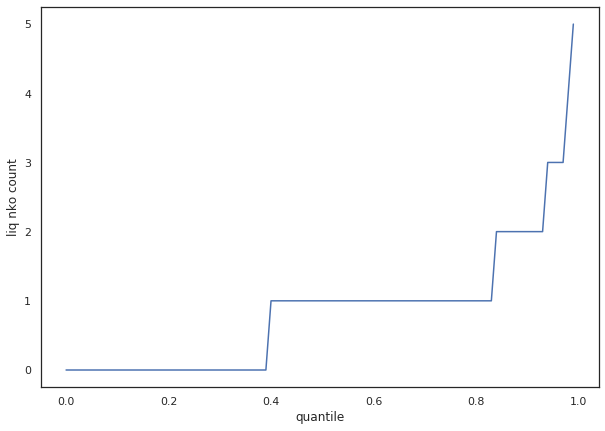

In [215]:
quantiles = np.linspace(0, 0.99, 100)
values = [df.liquidated_nko_count.quantile(q) for q in quantiles]

plt.figure(figsize=(10, 7))
plt.plot(quantiles, values)
plt.xlabel('quantile')
plt.ylabel('liq nko count')
plt.show()

In [216]:
df['factor_liq_nko_q81'] = df.liquidated_nko_count >= df.liquidated_nko_count.quantile(0.81)

## factor_active_nko_q50

In [217]:
df[df.active_nko_count > 0].shape

(3850, 20)

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


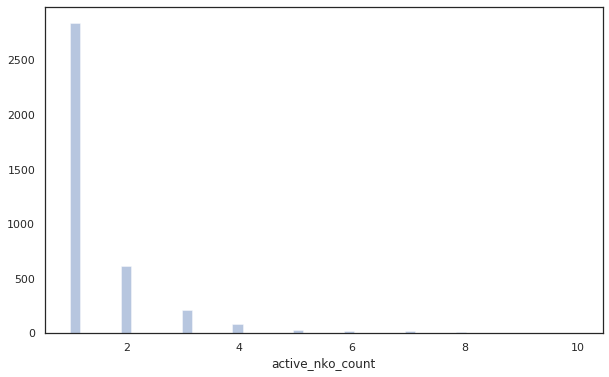

In [218]:
plt.figure(figsize=(10, 6))
sns.distplot(df[df.active_nko_count > 0].active_nko_count, kde=False)
plt.show()

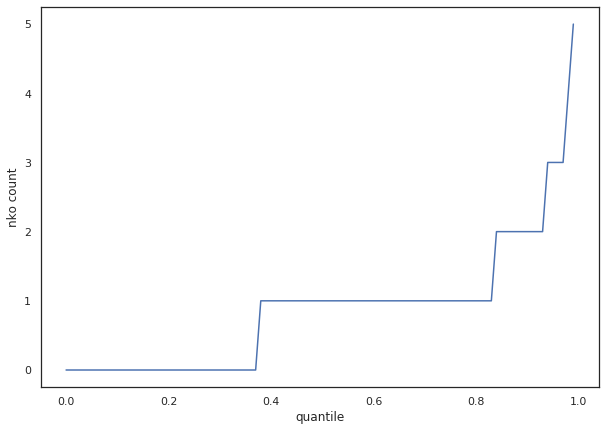

In [219]:
quantiles = np.linspace(0, 0.99, 100)
values = [df.active_nko_count.quantile(q) for q in quantiles]

plt.figure(figsize=(10, 7))
plt.plot(quantiles, values)
plt.xlabel('quantile')
plt.ylabel('nko count')
plt.show()

In [220]:
df.active_nko_count.median()

1.0

In [221]:
df['factor_active_nko_q50']  = df.active_nko_count >= df.active_nko_count.quantile(0.5)

## factor_region_wages

In [222]:
df['yearly_region_incomes_in_real_estate'] = (df.real_estate_price+0.0001) / (df.region_yearly_income+0.0001)

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


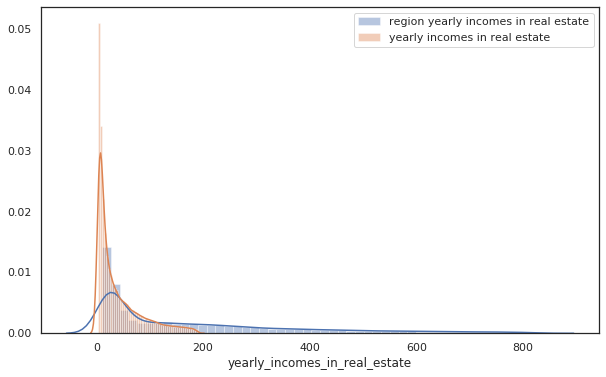

In [223]:
plt.figure(figsize=(10, 6))
sns.distplot(no_o(df['yearly_region_incomes_in_real_estate'], q=0.1), label='region yearly incomes in real estate')
sns.distplot(no_o(df['yearly_incomes_in_real_estate'], q=0.1), label='yearly incomes in real estate')
plt.legend()
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


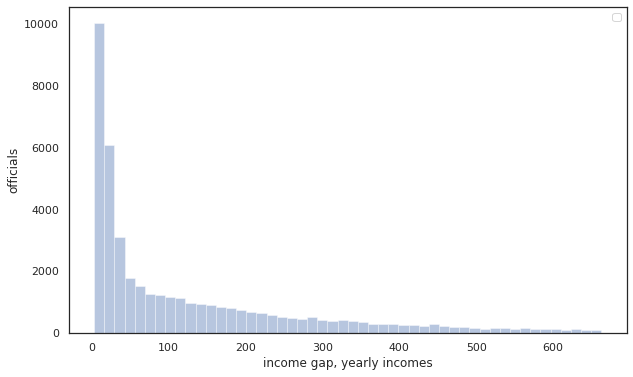

In [273]:
diff = df['yearly_region_incomes_in_real_estate'] - df['yearly_incomes_in_real_estate']

plt.figure(figsize=(10, 6))
sns.distplot(no_o(diff, q=0.1), kde=False)
plt.legend()
# plt.title('For an average person of the region it would take $60$ years longer')
plt.xlabel('income gap, yearly incomes')
plt.ylabel('officials')
plt.show()

In [274]:
diff[diff>=100].shape

(22926,)

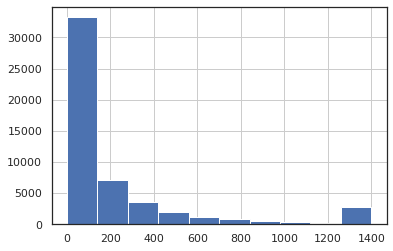

In [225]:
pd.Series(np.clip(diff, 0, 1400)).hist()

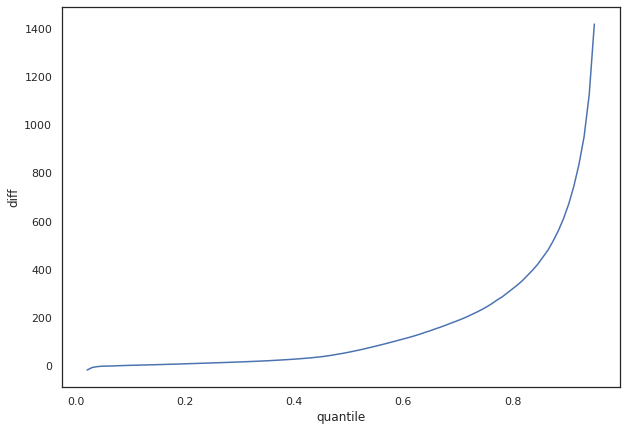

In [226]:
quantiles = np.linspace(0.02, 0.95, 100)
values = [diff.quantile(q) for q in quantiles]

plt.figure(figsize=(10, 7))
plt.plot(quantiles, values)
plt.xlabel('quantile')
plt.ylabel('diff')
plt.show()

In [227]:
values[-1]

1417.4434126156386

Такой доход и столько недвижки, что обычному человеку в регионе нужно 1500 лет, чтобы столько заработать

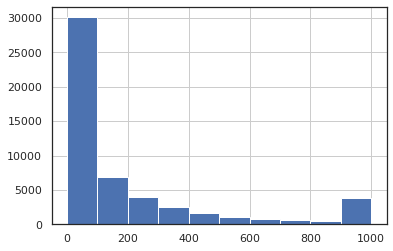

In [228]:
deviation = pd.Series(np.clip(diff, 0, 1000))
deviation.hist()

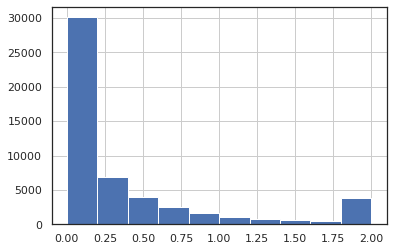

In [229]:
deviation_rescaled = 2*(deviation - deviation.min())/(deviation.max()-deviation.min())
deviation_rescaled.hist()

In [230]:
df['factor_region_wages_deviation'] = deviation_rescaled

## factor_offshore

In [231]:
df['factor_offshore'] = df['offshore_found'].astype(int)

# Affiliates

In [232]:
AFFILIATE_THRESHOLD = 2

In [233]:
df_graph = pd.read_csv('graph.csv')
df_graph.head()

person1  person2  years_worked_together
0        8        9                      8
1        8       10                      7
2        8       11                      4
3        8       12                      8
4        8       13                      8

In [234]:
df_graph.shape

(4437052, 3)

In [235]:
df_graph = df_graph[df_graph.years_worked_together >= AFFILIATE_THRESHOLD]
df_graph.shape

(994774, 3)

In [236]:
affiliates = df_graph.groupby('person1').agg({'person2': list})
affiliates['affiliate_count'] = affiliates.person2.apply(len)
affiliates = affiliates.rename({'person2': 'affiliate_ids'}, axis=1)
affiliates.index.name = 'person_id'
affiliates.head()

affiliate_ids  affiliate_count
person_id                                                                    
8          [9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22...              615
9          [10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 2...              614
10         [11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 2...              602
11         [12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 2...              555
12         [13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2...              611

In [237]:
df = pd.merge(df, affiliates, how='left', on='person_id')
df.head().T

0  \
person_id                                                                             8   
person_name                                                  зюганов геннадий андреевич   
income                                                                      3.73695e+06   
real_estate_price                                                           2.39099e+07   
yearly_incomes_in_real_estate                                                   6.39824   
contracts_count                                                                     NaN   
contracts_sum                                                                       NaN   
min_year                                                                            NaN   
max_year                                                                            NaN   
entries_count                                                                       NaN   
region                                                             российская федерация   
region_avg_wage                                                                 37111.2   
region_yearly_income                                                             445334   
active_nko_count                                                                      1   
liquidated_nko_count                                                                  0   
offshore_found                                                                    False   
factor_real_estate_q76                                                            False   
factor_real_estate_q96                                                            False   
factor_contracts_q51                                                              False   
factor_liq_nko_q81                                                                False   
factor_active_nko_q50                                                              True   
yearly_region_incomes_in_real_estate                                            53.6897   
factor_region_wages_deviation                                                 0.0945829   
factor_offshore                                                                       0   
affiliate_ids                         [9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22...   
affiliate_count                                                                     615   

                                                                                      1  \
person_id                                                                             9   
person_name                                                      алферов жорес иванович   
income                                                                       1.6807e+07   
real_estate_price                                                           9.95193e+08   
yearly_incomes_in_real_estate                                                   59.2128   
contracts_count                                                                     NaN   
contracts_sum                                                                       NaN   
min_year                                                                            NaN   
max_year                                                                            NaN   
entries_count                                                                       NaN   
region                                                             российская федерация   
region_avg_wage                                                                 37111.2   
region_yearly_income                                                             445334   
active_nko_count                                                                    NaN   
liquidated_nko_count                                                                NaN   
offshore_found                                                                    False   
factor_real_estate_q76                                                           

In [238]:
df[df.affiliate_ids.isnull()].shape

(32606, 26)

# MUTNY VODY INDEX

In [239]:
df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count  ... factor_real_estate_q76  \
0       NaN            NaN  ...                  False   
1       NaN            NaN  ...                  False   
2    2019.0            2.0  ...                  False   
3       NaN            NaN  ...                  False   
4       NaN            NaN  ...                  False   

   factor_real_estate_q96  factor_contracts_q51  factor_liq_nko_q81  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                  True               False   
3                   False                 False               False   
4                   False                 False               False   

   factor_active_nko_q50  yearly_region_incomes_in_real_estate  \
0                   True                             53.689688   
1                  False                           2234.709102   
2                   True                            109.593013   
3                  False                             19.333166   
4                  False                            274.694486   

   factor_region_wages_deviation  factor_offshore  \
0                       0.094583                0   
1                       2.000000                0   
2                       0.195817                0   
3                       0.033432                0   
4                       0.509676                0   

                                       affiliate_ids  affiliate_count  
0  [9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22...            615.0  
1  [10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 2...            614.0  
2  [11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 2...            602.0  
3  [12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 2...            555.0  
4  [13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2...            611.0  

[5 rows x 26 columns]

In [240]:
factors = ['factor_real_estate_q76', 'factor_real_estate_q96', 'factor_region_wages_deviation', 'factor_contracts_q51', 'factor_active_nko_q50', 'factor_liq_nko_q81', 'factor_offshore']
factor_coefficients = np.array([1, 1, 1, 1, 1, 1, 1])

def mvi(factors, coefficients):
    raw_index = np.sum(np.multiply(factors, coefficients))
    return raw_index

mvis = []
for row in df[['person_id']+factors].itertuples():
    row_mutny = mvi(row[2:], factor_coefficients)
    mvis.append({'person_id': row.person_id, 'mutny_index': row_mutny})
    
df_mutny = pd.DataFrame(mvis)
df_mutny.head()

mutny_index  person_id
0     1.094583          8
1     2.000000          9
2     2.195817         10
3     0.033432         11
4     0.509676         12

In [241]:
df = pd.merge(df, df_mutny, on='person_id', how='left')
df.head()

person_id                  person_name        income  real_estate_price  \
0          8   зюганов геннадий андреевич  3.736946e+06       2.390986e+07   
1          9       алферов жорес иванович  1.680704e+07       9.951926e+08   
2         10   андреев андрей анатольевич  4.176869e+06       4.880553e+07   
3         11  апарина алевтина викторовна  2.302677e+06       6.026755e+06   
4         12     афонин юрий вячеславович  6.160812e+06       1.223309e+08   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                       6.398235              NaN            NaN       NaN   
1                      59.212825              NaN            NaN       NaN   
2                      11.684715             12.0     3406433.29    2010.0   
3                       2.617282              NaN            NaN       NaN   
4                      19.856290              NaN            NaN       NaN   

   max_year  entries_count  ... factor_real_estate_q96  factor_contracts_q51  \
0       NaN            NaN  ...                  False                 False   
1       NaN            NaN  ...                  False                 False   
2    2019.0            2.0  ...                  False                  True   
3       NaN            NaN  ...                  False                 False   
4       NaN            NaN  ...                  False                 False   

   factor_liq_nko_q81  factor_active_nko_q50  \
0               False                   True   
1               False                  False   
2               False                   True   
3               False                  False   
4               False                  False   

   yearly_region_incomes_in_real_estate  factor_region_wages_deviation  \
0                             53.689688                       0.094583   
1                           2234.709102                       2.000000   
2                            109.593013                       0.195817   
3                             19.333166                       0.033432   
4                            274.694486                       0.509676   

   factor_offshore                                      affiliate_ids  \
0                0  [9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22...   
1                0  [10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 2...   
2                0  [11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 2...   
3                0  [12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 2...   
4                0  [13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2...   

   affiliate_count  mutny_index  
0            615.0     1.094583  
1            614.0     2.000000  
2            602.0     2.195817  
3            555.0     0.033432  
4            611.0     0.509676  

[5 rows x 27 columns]

In [242]:
df.mutny_index.isnull().any()

False

In [243]:
df = df.sort_values(by='mutny_index', ascending=False)
df.head()

person_id                     person_name      income  \
43991      44062    борисова елена александровна  4468867.57   
44506      44571       смирнов михаил николаевич   650000.00   
40697      40757  яковлев александр владимирович  1161408.00   
47778      47789     андреев владимир николаевич  2105802.44   
13796      14083       каракаев борис николаевич  7392841.15   

       real_estate_price  yearly_incomes_in_real_estate  contracts_count  \
43991       2.515160e+12                  562818.256996            191.0   
44506       1.753919e+09                    2698.337313            132.0   
40697       4.545511e+09                    3913.793348            156.0   
47778       6.596794e+09                    3132.674658              NaN   
13796       1.669090e+10                    2257.711353              NaN   

       contracts_sum  min_year  max_year  entries_count  ...  \
43991   7.035980e+07    2010.0    2019.0            5.0  ...   
44506   1.014167e+08    2010.0    2019.0            2.0  ...   
40697   3.181698e+08       NaN       NaN            2.0  ...   
47778            NaN       NaN       NaN            NaN  ...   
13796            NaN       NaN       NaN            NaN  ...   

      factor_real_estate_q96  factor_contracts_q51  factor_liq_nko_q81  \
43991                   True                  True                True   
44506                   True                  True                True   
40697                   True                  True                True   
47778                   True                 False                True   
13796                   True                 False                True   

       factor_active_nko_q50  yearly_region_incomes_in_real_estate  \
43991                   True                          2.905976e+06   
44506                   True                          4.600171e+03   
40697                   True                          1.020696e+04   
47778                   True                          2.452218e+04   
13796                   True                          6.204487e+04   

       factor_region_wages_deviation  factor_offshore  \
43991                            2.0                1   
44506                            2.0                0   
40697                            2.0                0   
47778                            2.0                1   
13796                            2.0                1   

                                           affiliate_ids  affiliate_count  \
43991                                                NaN              NaN   
44506                                                NaN              NaN   
40697                                                NaN              NaN   
47778                                                NaN              NaN   
13796  [14084, 14085, 14086, 14087, 14088, 14089, 140...             29.0   

       mutny_index  
43991          8.0  
44506          7.0  
40697          7.0  
47778          7.0  
13796          7.0  

[5 rows x 27 columns]

## Affiliate mutny

In [244]:
df_mutny.index = df_mutny.person_id
mutny_lookup = df_mutny.to_dict()['mutny_index']

In [245]:
# mutny_lookup

In [246]:
affiliate_mvis = []
count_total = 0
count_error = 0
for row in df[['person_id', 'affiliate_ids']].itertuples():
    count_total+=1
    if row.affiliate_ids is np.NaN:
        count_error+=1
        continue
    affiliate_mutnys = [mutny_lookup[pid] for pid in row.affiliate_ids]
    average_mutny = np.mean(affiliate_mutnys)
    affiliate_mvis.append({'person_id': row.person_id, 'avg_affiliate_mutny': average_mutny})
print(count_total, count_error)
print(len(affiliate_mvis))
df_affiliate_mvis = pd.DataFrame(affiliate_mvis)
df_affiliate_mvis.head()

52514 32968
19546


avg_affiliate_mutny  person_id
0             2.373342      14083
1             0.395845      16922
2             0.653227       4166
3             0.701372      45341
4             0.419524       2231

In [247]:
df_affiliate_mvis.shape

(19546, 2)

In [248]:
df = pd.merge(df, df_affiliate_mvis, on='person_id', how='left')
df['avg_affiliate_mutny'] = df['avg_affiliate_mutny'].fillna(0) 
df.head()

person_id                     person_name      income  real_estate_price  \
0      44062    борисова елена александровна  4468867.57       2.515160e+12   
1      44571       смирнов михаил николаевич   650000.00       1.753919e+09   
2      40757  яковлев александр владимирович  1161408.00       4.545511e+09   
3      47789     андреев владимир николаевич  2105802.44       6.596794e+09   
4      14083       каракаев борис николаевич  7392841.15       1.669090e+10   

   yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
0                  562818.256996            191.0   7.035980e+07    2010.0   
1                    2698.337313            132.0   1.014167e+08    2010.0   
2                    3913.793348            156.0   3.181698e+08       NaN   
3                    3132.674658              NaN            NaN       NaN   
4                    2257.711353              NaN            NaN       NaN   

   max_year  entries_count  ... factor_contracts_q51  factor_liq_nko_q81  \
0    2019.0            5.0  ...                 True                True   
1    2019.0            2.0  ...                 True                True   
2       NaN            2.0  ...                 True                True   
3       NaN            NaN  ...                False                True   
4       NaN            NaN  ...                False                True   

   factor_active_nko_q50  yearly_region_incomes_in_real_estate  \
0                   True                          2.905976e+06   
1                   True                          4.600171e+03   
2                   True                          1.020696e+04   
3                   True                          2.452218e+04   
4                   True                          6.204487e+04   

   factor_region_wages_deviation  factor_offshore  \
0                            2.0                1   
1                            2.0                0   
2                            2.0                0   
3                            2.0                1   
4                            2.0                1   

                                       affiliate_ids  affiliate_count  \
0                                                NaN              NaN   
1                                                NaN              NaN   
2                                                NaN              NaN   
3                                                NaN              NaN   
4  [14084, 14085, 14086, 14087, 14088, 14089, 140...             29.0   

   mutny_index  avg_affiliate_mutny  
0          8.0             0.000000  
1          7.0             0.000000  
2          7.0             0.000000  
3          7.0             0.000000  
4          7.0             2.373342  

[5 rows x 28 columns]

In [249]:
df['mutny_index'].mean()

1.039080379055758

In [250]:
df['mutny_index'].describe()

count    53786.000000
mean         1.039080
std          1.268187
min          0.000000
25%          0.042355
50%          0.450905
75%          1.616799
max          8.000000
Name: mutny_index, dtype: float64

In [251]:
df['avg_affiliate_mutny'].describe()

count    53786.000000
mean         0.403724
std          0.646822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.729578
max          7.000000
Name: avg_affiliate_mutny, dtype: float64

In [252]:
df['affiliate_count'][df['affiliate_count'] != 0].shape

(53786,)

In [253]:
df['mutny_corrected'] = df['mutny_index'] + df['avg_affiliate_mutny']/2
df = df.sort_values(by='mutny_corrected', ascending=False)
df.head(15)

person_id                     person_name        income  \
127      14110    федоров алексей владимирович  9.688387e+05   
23         880   иванов владимир александрович  3.403756e+06   
4        14083       каракаев борис николаевич  7.392841e+06   
15       14624      максимов сергей викторович  3.022888e+06   
0        44062    борисова елена александровна  4.468868e+06   
68       13375         носов сергей николаевич  7.679112e+05   
21       13751  морозов александр владимирович  3.169095e+06   
129      17956      павлов сергей владимирович  2.935095e+06   
130      36868      шевченко владимир иванович  1.545382e+06   
44       20026    степанов владимир николаевич  3.756073e+06   
31       20026    степанов владимир николаевич  3.756073e+06   
25       20026    степанов владимир николаевич  3.756073e+06   
27       20026    степанов владимир николаевич  3.756073e+06   
28       20026    степанов владимир николаевич  3.756073e+06   
29       20026    степанов владимир николаевич  3.756073e+06   

     real_estate_price  yearly_incomes_in_real_estate  contracts_count  \
127       2.294834e+09                    2368.644146             14.0   
23        5.063574e+08                     148.764321             17.0   
4         1.669090e+10                    2257.711353              NaN   
15        1.316803e+12                  435610.883186            740.0   
0         2.515160e+12                  562818.256996            191.0   
68        1.013789e+11                  132019.055664             20.0   
21        2.506424e+11                   79089.594881            460.0   
129       5.903267e+09                    2011.269479            313.0   
130       3.480567e+09                    2252.237659             31.0   
44        1.365584e+09                     363.567000           1211.0   
31        1.365584e+09                     363.567000              2.0   
25        1.365584e+09                     363.567000              2.0   
27        1.365584e+09                     363.567000              2.0   
28        1.365584e+09                     363.567000              2.0   
29        1.365584e+09                     363.567000              2.0   

     contracts_sum  min_year  max_year  entries_count  ... factor_liq_nko_q81  \
127   1.060086e+07    2017.0    2018.0            2.0  ...               True   
23    1.209993e+07    2011.0    2017.0            1.0  ...               True   
4              NaN       NaN       NaN            NaN  ...               True   
15    6.564342e+08    2011.0    2019.0            1.0  ...               True   
0     7.035980e+07    2010.0    2019.0            5.0  ...               True   
68    5.538037e+06    2011.0    2011.0            1.0  ...               True   
21    2.324331e+08    2010.0    2019.0            5.0  ...               True   
129   1.438197e+08    2007.0    2019.0            3.0  ...               True   
130   1.189979e+07    2011.0    2019.0            1.0  ...               True   
44    1.760005e+09    2011.0    2019.0            2.0  ...               True   
31    1.395669e+04    2017.0    2018.0            1.0  ...               True   
25    1.395669e+04    2017.0    2018.0            1.0  ...               True   
27    1.395669e+04    2017.0    2018.0            1.0  ...               True   
28    1.395669e+04    2017.0    2018.0            1.0  ...               True   
29    1.395669e+04    2017.0    2018.0            1.0  ...               True   

     factor_active_nko_q50  yearly_region_incomes_in_real_estate  \
127                   True                          8.530557e+03   
23                    True                          1.477803e+03   
4                     True                          6.204487e+04   
15                    True                          4.762574e+06   
0                     True                          2.905976e+06   
68                    True                          3.305290e+05   
21                    

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


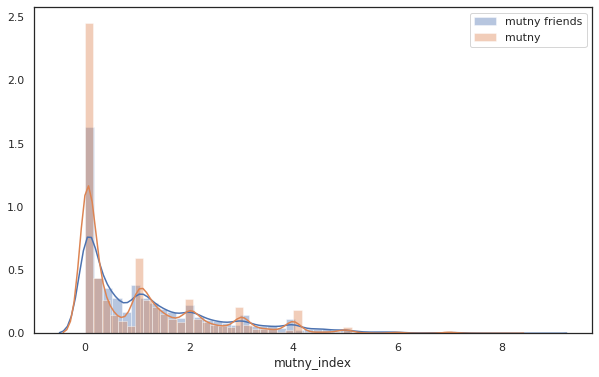

In [254]:
plt.figure(figsize=(10, 6))
sns.distplot(df.mutny_corrected,  label='mutny friends', kde=True)
sns.distplot(df.mutny_index,  label='mutny', kde=True)
plt.legend()
plt.show()

In [255]:
df[df.mutny_index > 0].shape, df[df.affiliate_ids.isnull()].shape

((52062, 29), (32968, 29))

In [256]:
df[(df.mutny_index > 2) & (df.affiliate_ids.isnull())].shape

(5503, 29)

In [257]:
df.to_csv('mutny_factors.csv', index=None)

In [258]:
df[df.person_name.str.contains('коган александр')]

person_id                person_name        income  real_estate_price  \
5185        143  коган александр борисович  2.126119e+07       6.526640e+08   

      yearly_incomes_in_real_estate  contracts_count  contracts_sum  min_year  \
5185                      30.697443            612.0   6.743410e+09    2011.0   

      max_year  entries_count  ... factor_liq_nko_q81  factor_active_nko_q50  \
5185    2019.0            1.0  ...              False                  False   

      yearly_region_incomes_in_real_estate  factor_region_wages_deviation  \
5185                           1465.559756                            2.0   

      factor_offshore                                      affiliate_ids  \
5185                0  [144, 145, 146, 147, 149, 150, 152, 153, 154, ...   

      affiliate_count  mutny_index  avg_affiliate_mutny  mutny_corrected  
5185            146.0          3.0             1.788981         3.894491  

[1 rows x 29 columns]

In [259]:
df.columns

Index(['person_id', 'person_name', 'income', 'real_estate_price',
       'yearly_incomes_in_real_estate', 'contracts_count', 'contracts_sum',
       'min_year', 'max_year', 'entries_count', 'region', 'region_avg_wage',
       'region_yearly_income', 'active_nko_count', 'liquidated_nko_count',
       'offshore_found', 'factor_real_estate_q76', 'factor_real_estate_q96',
       'factor_contracts_q51', 'factor_liq_nko_q81', 'factor_active_nko_q50',
       'yearly_region_incomes_in_real_estate', 'factor_region_wages_deviation',
       'factor_offshore', 'affiliate_ids', 'affiliate_count', 'mutny_index',
       'avg_affiliate_mutny', 'mutny_corrected'],
      dtype='object')

In [260]:
df[df.person_id == 20026].iloc[0].yearly_incomes_in_real_estate

363.56699976298205